In [ ]:
#Importing the matrix exponentiation function
from scipy.linalg import expm
#Importing constants
import scipy.constants as const
#Numpy
import numpy as np
#Plotting
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from qiskit.visualization import plot_bloch_vector

## Question 1
Quantum states are given by the following expressions <p>
| ψ1 > = - \sqrt 3 /2|0⟩ + i/2 |1⟩
|ψ2⟩ = (1/2 +i/2)|0⟩ + (1/2 -i/2)|1⟩ <p>
Whate are the angles Θ and ϕ?


In [2]:
def alpha(state):
    return state[0][0]

def beta(state):
    return state[1][0]

def remove_global_phase(alpha, beta):
    # Let's find the phase of alpha and multiply alpha and beta by the conjugate to remove it
    # After removing global phase we take only the real part as the imag part of alpha is numerical noise
    phase_alpha = np.angle(complex(alpha))
    alpha = np.real(alpha*np.exp(-1j*phase_alpha))
    beta  = beta*np.exp(-1j*phase_alpha)

    return [alpha, beta]

def check_normalised(alpha, beta):
    prob_alpha = np.abs(alpha)**2
    prob_beta  = np.abs(beta)**2
    prob_sum   = prob_alpha + prob_beta

    return np.isclose(prob_sum, 1)

def amplitudes_to_angles(alpha, beta):
    # Remove global phase
    amplitudes = remove_global_phase(alpha, beta)

    theta = 2*np.arccos(alpha)
    phi   = np.angle(beta)

    return [theta, phi]

def find_bloch_vector(state_values, coeff_type='amplitudes'):

    # I flatten the input list if given as a column vector
    # We represent column vectors as a list of lists in numpy arrays for matrix-vector multiplication
    # The length of the shape of [1, 2, 3] is 1, the length of the shape [[1],[2],[3]] is 2
    if len(np.shape(state_values)) > 1:
        state_values = list(np.concatenate(state_values).flat)

    if(coeff_type == 'amplitudes'):
        amplitudes = remove_global_phase(state_values[0], state_values[1])
        angles     = amplitudes_to_angles(amplitudes[0], amplitudes[1]) #angles [theta, phi]
        # These are the projections from a 3D spherical coodinates vector to x,y,z coordinates
        bloch_x = np.sin(angles[0])*np.cos(angles[1])
        bloch_y = np.sin(angles[0])*np.sin(angles[1])
        bloch_z = np.cos(angles[0])
    elif(coeff_type == 'angles'):
        angles = state_values
        # These are the projections from a 3D spherical coodinates vector to x,y,z coordinates
        bloch_x = np.sin(angles[0])*np.cos(angles[1])
        bloch_y = np.sin(angles[0])*np.sin(angles[1])
        bloch_z = np.cos(angles[0])

    return [bloch_x, bloch_y, bloch_z]

In [3]:
initial_state1 = np.array([[-np.sqrt(3)/2],[1j/2]])

angles1 = amplitudes_to_angles(alpha(initial_state1), beta(initial_state1))
print('For |\Psi_1> \n Theta = {} radians\n Psi = {} radians '.format(angles1[0], angles1[1]))

initial_state2 = np.array([[1/2 + 1j/2],[1/2 - 1j/2]])
g_state2 = remove_global_phase(alpha(initial_state2), beta(initial_state2))

angles2 = amplitudes_to_angles(g_state2[0], g_state2[1])
print('For |\Psi_1> \n Theta = {} radians\n Psi = {} radians '.format(angles2[0], angles2[1]))



For |\Psi_1> 
 Theta = (5.235987755982989+0j) radians
 Psi = 1.5707963267948966 radians 
For |\Psi_1> 
 Theta = 1.5707963267948968 radians
 Psi = -1.5707963267948966 radians 


For |ψ1⟩,  Θ = 5.236 radians, ϕ = 1.571 radians,  Its gobal phase = 0 and relative phase = ϕ = 1.571 radians
<p>
For |ψ2⟩, Θ = 1.571 radians, ϕ =-1.570 radians. The global phase = i/2 = 1.571 radians and the relative phase = ψ = -1.571 radians

## Question 2
Visualise schematically the Bloch sphere. Where are the two states of the Z-basis placed? Where are
the two states of the X-basis placed? What are the unitary transform converting the Z-basis to X-basis
and vice versa?

Z Basis |0⟩ = (1, 0)T and |1⟩ = (0, 1)T, visually these are pointing towards either |0⟩ or |1⟩

X Basis: |+⟩ = 1/sqrt{2} (|0⟩+|1⟩)<p>
X Basis: |+⟩ = 1/sqrt{2} (|0⟩-|1⟩)<p>
These are both placed along the x axis pointing out where the is an equal proability of |0⟩ and |1⟩<p>

The Hadamarad gate is used to transform between the Z and X basis, where H = 1/sqrt(2)[[1 , 1][1, -1]]. This transformation is unitary so it used going from X to Z as well.


## Question 3
Assume the hamiltonian is expressed as by the off diagonals of 2x2 matrix, δ, with a certain evolution operator. where δ is the energy of transition from one state of a qubit to another, α = δ · t/ℏ, t is time and ℏ is
Planck’s constant. The parameter α is dimensionless. Take the initial state |ψ0⟩ = 1 · |0⟩ + 0 · |1⟩, and
the four examples of α = 0, π/2, π, 3π/2, and 2π. What action will this evolution operator generate
on the surface of the Bloch sphere? Visualise the states produced by this operator and identify this
single qubit operator

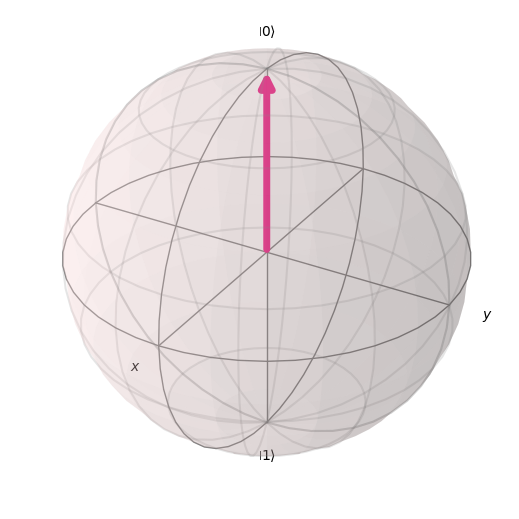

In [4]:
initial_state = np.array([[1],[0]])
evolution_operator = lambda alpha : np.array([[np.cos(alpha), -1j*np.sin(alpha)], [-1j*np.sin(alpha), np.cos(alpha)]])

current_state = np.matmul(evolution_operator(0), initial_state)
test_bloch_vector = find_bloch_vector(current_state, coeff_type = 'amplitudes')
plot_bloch_vector(test_bloch_vector, coord_type='cartesian')

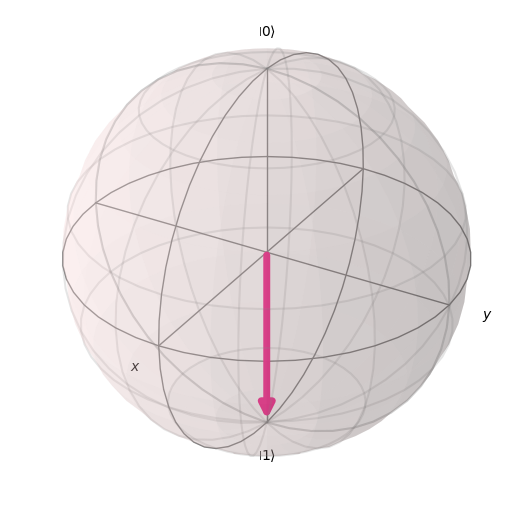

In [5]:
current_state = np.matmul(evolution_operator(np.pi/2), initial_state)
test_bloch_vector = find_bloch_vector(current_state, coeff_type = 'amplitudes')
plot_bloch_vector(test_bloch_vector, coord_type='cartesian')

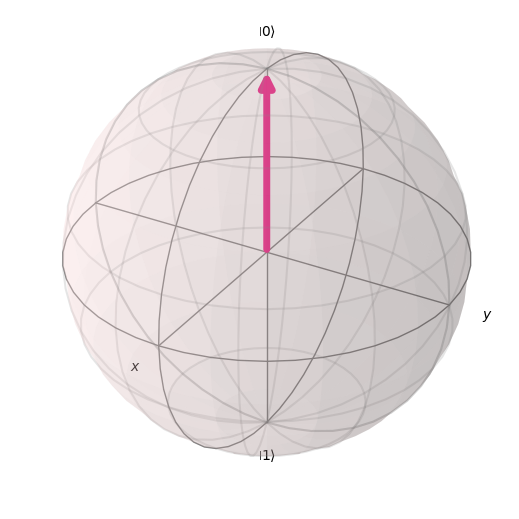

In [6]:
current_state = np.matmul(evolution_operator(np.pi), initial_state)
test_bloch_vector = find_bloch_vector(current_state, coeff_type = 'amplitudes')
plot_bloch_vector(test_bloch_vector, coord_type='cartesian')

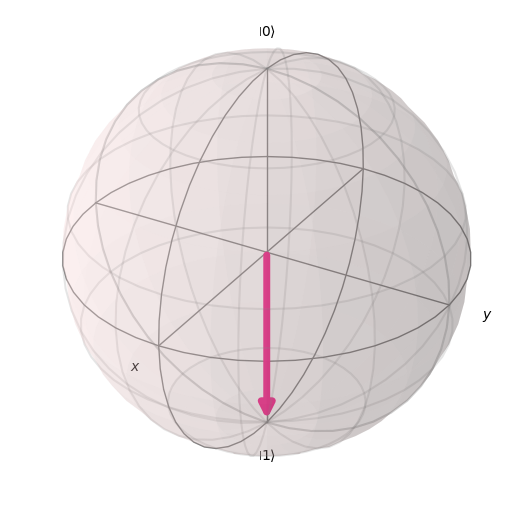

In [7]:
current_state = np.matmul(evolution_operator(3*np.pi/2), initial_state)
test_bloch_vector = find_bloch_vector(current_state, coeff_type = 'amplitudes')
plot_bloch_vector(test_bloch_vector, coord_type='cartesian')

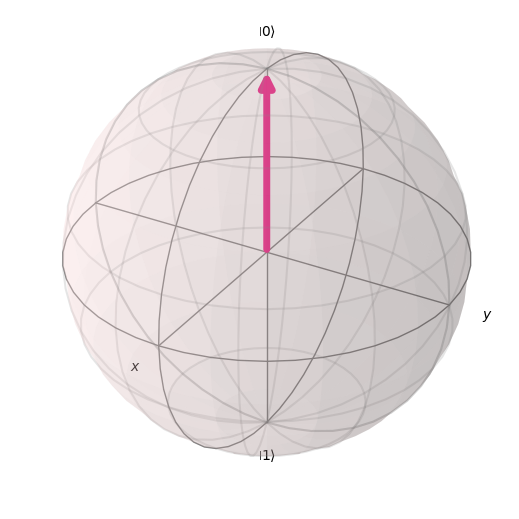

In [8]:
current_state = np.matmul(evolution_operator(2*np.pi), initial_state)
test_bloch_vector = find_bloch_vector(current_state, coeff_type = 'amplitudes')
plot_bloch_vector(test_bloch_vector, coord_type='cartesian')

The Evolution Operater will rotate it about the xz circle based on the angle α
The angles move the state from one to another the same as a X gate